# COVID19 Insight

## Use Google Trends API to create:
### - a data table
### - an insights narrative
### - to help communicate what you believe to be important information

In [1]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
nytimes_2020_Jan_to_Jun = pd.read_csv (r'Data/NYTimes/us-counties-2020-Jan-Jun.txt')
nytimes_2020_Jan_to_Jun.to_csv (r'Data/NYTimes/us-counties-2020-Jan-Jun.csv', index=None)
nytimes_2020_Jan_to_Jun

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
290224,2020-06-30,Sweetwater,Wyoming,56037.0,90,0.0
290225,2020-06-30,Teton,Wyoming,56039.0,129,1.0
290226,2020-06-30,Uinta,Wyoming,56041.0,176,0.0
290227,2020-06-30,Washakie,Wyoming,56043.0,38,5.0


In [8]:
nytimes_2020_Jan_to_Jun = nytimes_2020_Jan_to_Jun.drop(['county','fips'], axis=1)

In [9]:
nytimes_2020_Jan_to_Jun['date'] = pd.to_datetime(nytimes_2020_Jan_to_Jun["date"], infer_datetime_format=True)

In [10]:
nytimes_2020_Jan_to_Jun['date']

0        2020-01-21
1        2020-01-22
2        2020-01-23
3        2020-01-24
4        2020-01-24
            ...    
290224   2020-06-30
290225   2020-06-30
290226   2020-06-30
290227   2020-06-30
290228   2020-06-30
Name: date, Length: 290229, dtype: datetime64[ns]

In [11]:
nytimes_2020_Jan_to_Jun['cases'].sum()

131448976

In [12]:
nytimes_2020_Jan_to_Jun['deaths'].sum()

7204945.0

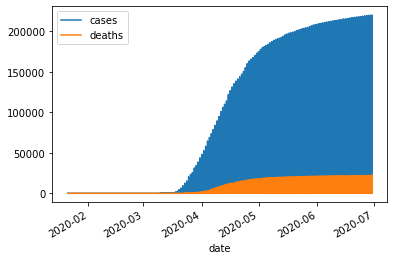

In [13]:
#nytimes_2020_Jan_to_Jun.plot(x='date', y='cases', kind = 'line', use_index=True)
nytimes_2020_Jan_to_Jun.plot(x='date', kind = 'line', use_index=True)
plt.show()

In [15]:
nytimes_2022_Jan_to_May = pd.read_csv (r'Data/NYTimes/us-counties-2022-Jan-May.txt')
nytimes_2022_Jan_to_May.to_csv (r'Data/NYTimes/us-counties-2022-Jan-May.csv', index=None)
nytimes_2022_Jan_to_May

,date,county,state,fips,cases,deaths
0,2022-01-01,Autauga,Alabama,1001.0,11018,160.0
1,2022-01-01,Baldwin,Alabama,1003.0,39911,593.0
2,2022-01-01,Barbour,Alabama,1005.0,3860,81.0
3,2022-01-01,Bibb,Alabama,1007.0,4533,95.0
4,2022-01-01,Blount,Alabama,1009.0,11256,198.0
...,...,...,...,...,...,...
422943,2022-05-10,Sweetwater,Wyoming,56037.0,11088,126.0
422944,2022-05-10,Teton,Wyoming,56039.0,10074,16.0
422945,2022-05-10,Uinta,Wyoming,56041.0,5643,39.0
422946,2022-05-10,Washakie,Wyoming,56043.0,2358,44.0


In [16]:
nytimes_2022_Jan_to_May = nytimes_2022_Jan_to_May.drop(['county','fips'], axis=1)

In [17]:
nytimes_2022_Jan_to_May['date'] = pd.to_datetime(nytimes_2022_Jan_to_May["date"], infer_datetime_format=True)

In [18]:
nytimes_2022_Jan_to_May['date']

0        2022-01-01
1        2022-01-01
2        2022-01-01
3        2022-01-01
4        2022-01-01
            ...    
422943   2022-05-10
422944   2022-05-10
422945   2022-05-10
422946   2022-05-10
422947   2022-05-10
Name: date, Length: 422948, dtype: datetime64[ns]

In [19]:
nytimes_2022_Jan_to_May['cases'].sum()

9909735772

In [20]:
nytimes_2022_Jan_to_May['deaths'].sum()

121778757.0

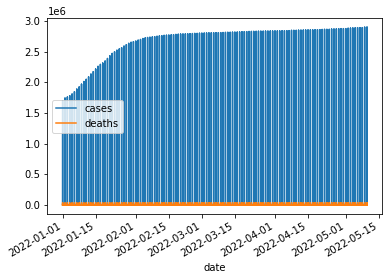

In [21]:
nytimes_2022_Jan_to_May.plot(x='date', kind = 'line', use_index=True)
plt.show()

In [ ]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)
# pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,25), proxies=['https://34.203.233.13:80',], retries=2, backoff_factor=0.1, requests_args={'verify':False})

In [ ]:
kw_list = ["covid symptoms","covid deaths","covid cases","unemployment benefits"]
pytrends.build_payload(kw_list, cat=0, timeframe='2020-01-01 2022-05-11', geo='US', gprop='')

### Interest Over Time

In [ ]:
interest = pytrends.interest_over_time()
interest

### Historical Hourly Interest

In [ ]:
pytrends.get_historical_interest(kw_list, year_start=2022, month_start=1, day_start=1, hour_start=0, year_end=2022, month_end=2, day_end=1, hour_end=0, cat=0, geo='US', gprop='', sleep=0)

### Interest by Region

In [ ]:
pytrends.interest_by_region(resolution='REGION', inc_low_vol=True, inc_geo_code=True)

In [ ]:
interest.plot(y='covid symptoms', kind = 'line', use_index=True)
interest.plot(y='covid deaths', kind = 'line', use_index=True)
interest.plot(y='covid cases', kind = 'line', use_index=True)
plt.show()


In [ ]:
list(interest.columns)